In [242]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")

In [243]:
#genrating dummy dataset

X,y = make_blobs(n_samples=2000,n_features=2,cluster_std=3, centers=2,random_state=40)

n_features=2
print(X.shape)
print(y.shape)

(2000, 2)
(2000,)


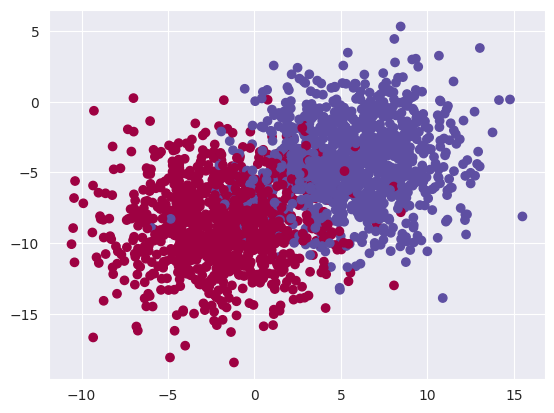

In [244]:
#Visualise Datasets

def visualise(X,y):
  plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral)
  plt.show()

visualise(X,y)

In [245]:
#Normalise The Data
def normalise(X):
  u=X.mean(axis=0)
  s=X.std(axis=0)
  return (X-u)/s

X=normalise(X)

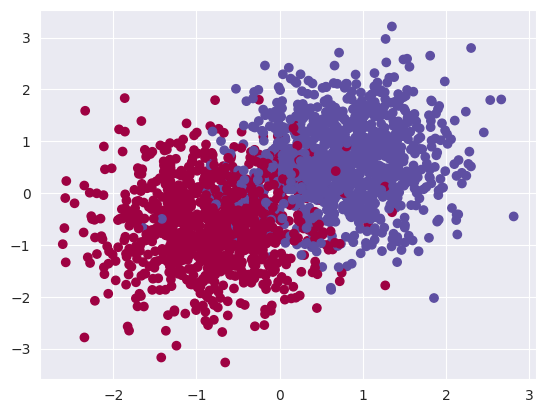

In [246]:
visualise(X,y)

In [247]:
# Train Test Splits

XT,Xt , yT,yt =train_test_split(X,y,test_size=0.2,random_state=0)
print(XT.shape)
print(yT.shape)
print(Xt.shape)
print(yt.shape)

(1600, 2)
(1600,)
(400, 2)
(400,)


In [248]:
#Hypothesis Function

def sigmoid(z):
  return 1/(1+np.exp(-z))

def Hypothesis(X,theta):
  return sigmoid(np.dot(X,theta))

In [249]:
#Loss function ,i.e Binary cross Entropy

def loss(y,yp):
  loss =-np.mean(y*np.log(yp)+(1-y)*np.log(1-yp))
  return loss

In [250]:
#Gradient computation

def gradient(X,y,yp):
  m=X.shape[0]
  grad=np.dot(X.T,(y-yp))
  return -grad/m

In [251]:
#Training our Model

def train(X,y ,LR=0.1, maxItrs=1000):
  theta =np.random.randn(n_features+1,1)
  error_list=[]
  for i in range(maxItrs):
    yp=Hypothesis(X,theta)
    error_list.append(loss(y,yp))
    grad=gradient(X,y,yp)
    theta=theta-LR*grad
  plt.plot(error_list)
  return theta

In [252]:
#accuracy of the model test
def accuracy(X,y,theta):
  h=Hypothesis(X,theta)
  preds=np.zeros((X.shape[0], 1) , dtype=int)
  preds[h >=0.5]=1
  return ((y==preds).sum())/y.shape[0]*100

In [253]:
#adding a extra Column
def add_column(X):
  if X.shape[1]== n_features:
    one = np.ones((X.shape[0],1))
    X=np.hstack((one,X))
  return X
XT=add_column(XT)
Xt=add_column(Xt)



In [254]:
yT = yT.reshape(-1,1)
yt = yt.reshape(-1,1)

print(YT.shape)
print(XT.shape)

(1600,)
(1600, 3)


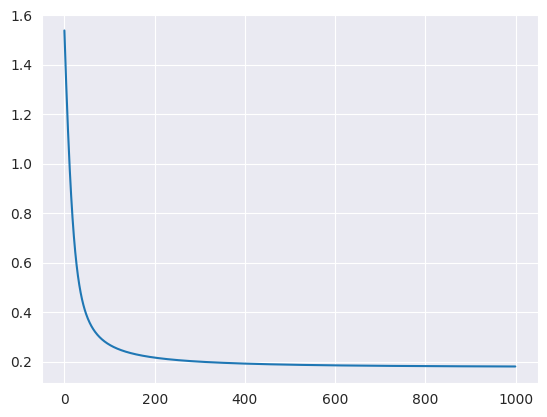

In [255]:
theta=train(XT,yT)

In [256]:
theta

array([[0.01101909],
       [3.39566553],
       [1.712199  ]])

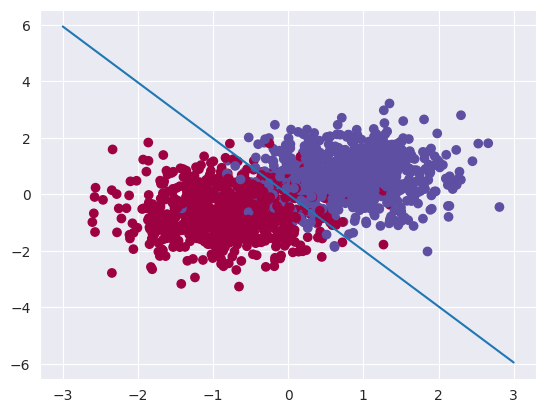

In [257]:
plt.scatter(XT[:,1],XT[:,2],c=yT,cmap=plt.cm.Spectral)
x1=np.linspace(-3,3,6)
x2=-(theta[0][0]+theta[1][0]*x1)/theta[2][0]
plt.plot(x1,x2)
plt.show()

In [258]:
#prediction
def predict(X,theta):
  h=Hypothesis(X,theta)
  yp=np.zeros((X.shape[0], 1) , dtype=int)
  yp[h >=0.5]=1
  return yp

predict=predict(Xt,theta)

In [259]:
predict

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [260]:
accuracy(XT,yT,theta)

92.75

In [261]:
accuracy(Xt,yt,theta)

90.25